In [3]:
#+++ версия 2020.09.21 инициализация посредством global init()
from importlib import reload
import adds
adds = reload(adds)
from adds import * # import adds functions

init()

ii(dfr)

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from datetime import timedelta
from datetime import datetime
import matplotlib.dates as mdates
# read_rmsp()

0:00:00.001 ₀╷₀₀╷₀₀.₀₀₁ init()


,1,2,3,4,5,6,7,8,9,10
0,HTML,Path,Struct,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__
1,__spec__,_log,_o,adds,datetime,df_info,dfr,disp,display,draw_l
2,glob,gmtime,grpp,ii,init,isfile,join,l,listdir,math
3,merge_OKVED,np,os,pd,read_rmsp,reload,requests,shutil,sizeof_fmt,start
4,strftime,time,tm,tmpxls,xl_rowcol_to_cell,xlspcl,zipfile,-,-,-


,name,rows,cols,memory,keys


In [4]:
import sys
sys.path.append('settings/')
import ftps

ftps = reload(ftps)
ftps
ftps.reg
locals().update(ftps.reg)
# print (ftps.clock_ftp)

In [5]:
yandex_weather_cols = {
    "now": 1641137402,
    "now_dt": "2022-01-02T15:30:02.853873Z",
    "info": {"url": "https://yandex.ru/pogoda/213?lat=55.692\u0026lon=37.347", "lat": 55.692, "lon": 37.347},
    "fact": {
        "obs_time": 1641135600,
        "temp": -8,
        "feels_like": -12,
        "icon": "ovc",
        "condition": "overcast",
        "wind_speed": 1,
        "wind_dir": "w",
        "pressure_mm": 742,
        "pressure_pa": 989,
        "humidity": 83,
        "daytime": "n",
        "polar": False,
        "season": "winter",
        "wind_gust": 6.6
    },
    "forecast": {
        "date": "2022-01-03",
        "date_ts": 1641157200,
        "week": 1,
        "sunrise": "08:59",
        "sunset": "16:10",
        "moon_code": 8,
        "moon_text": "moon-code-8",
        "parts": [{
            "part_name": "night",
            "temp_min": -12,
            "temp_avg": -12,
            "temp_max": -10,
            "wind_speed": 1.9,
            "wind_gust": 3.6,
            "wind_dir": "sw",
            "pressure_mm": 741,
            "pressure_pa": 987,
            "humidity": 86,
            "prec_mm": 0,
            "prec_prob": 0,
            "prec_period": 360,
            "icon": "bkn_n",
            "condition": "cloudy",
            "feels_like": -17,
            "daytime": "n",
            "polar": False
        }, {
            "part_name": "morning",
            "temp_min": -11,
            "temp_avg": -10,
            "temp_max": -9,
            "wind_speed": 2.3,
            "wind_gust": 4.8,
            "wind_dir": "s",
            "pressure_mm": 738,
            "pressure_pa": 983,
            "humidity": 87,
            "prec_mm": 0.3,
            "prec_prob": 30,
            "prec_period": 360,
            "icon": "ovc_-sn",
            "condition": "light-snow",
            "feels_like": -15,
            "daytime": "d",
            "polar": False
        }]
    }
}

print (yandex_weather_cols['forecast']['parts'][0].keys())

dict_keys(['part_name', 'temp_min', 'temp_avg', 'temp_max', 'wind_speed', 'wind_gust', 'wind_dir', 'pressure_mm', 'pressure_pa', 'humidity', 'prec_mm', 'prec_prob', 'prec_period', 'icon', 'condition', 'feels_like', 'daytime', 'polar'])


In [6]:
level_1 = ['now', 'now_dt', 'info', 'fact', 'forecast']
fact_cols = ['obs_time', 'temp', 'feels_like', 'icon', 'condition', 
        'wind_speed', 'wind_dir', 'pressure_mm', 'pressure_pa', 
        'humidity', 'daytime', 'polar', 'season', 'wind_gust']

forecast = ['date', 'date_ts', 'week', 'sunrise', 'sunset', 'moon_code', 'moon_text', 'parts']
forecast_info =  ['date', 'date_ts', 'week', 'sunrise', 'sunset', 'moon_code', 'moon_text', 'parts']
forecast_info_parts = ['part_name', 'temp_min', 'temp_avg', 'temp_max', 'wind_speed', 'wind_gust', 
                  'wind_dir', 'pressure_mm', 'pressure_pa', 'humidity', 'prec_mm', 'prec_prob', 
                  'prec_period', 'icon', 'condition', 'feels_like', 'daytime', 'polar']

predict = ['part_name', 'temp_min', 'temp_avg', 'temp_max', 'wind_speed', 'wind_gust', 'wind_dir', 'pressure_mm', 'pressure_pa', 'humidity',
            'prec_mm', 'prec_prob', 'prec_period', 'icon', 'condition', 'feels_like', 'daytime', 'polar']

0:00:13.799 ₀╷₀₀╷₁₃.₈₀₂ 03. annot_max() defined 
0:00:00.703 ₀╷₀₀╷₁₄.₅₀₅ 02. read_weather_from() defined


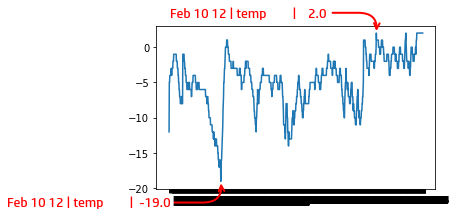

<AxesSubplot:>

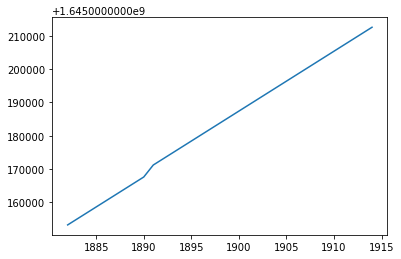

In [7]:
from ftplib import FTP
import json

import pandas as pd
import sys
sys.path.append('settings/')
import ftps
ftps = reload(ftps)
global buff 
global annotation_shift
annotation_shift = 0

locals().update(ftps.clock_ftp)


def annot_max(param):
    
    global  annotation_shift
    annotation_shift += 1
    
    (x,y,k,color,ax) = param
    
    xmax = x[np.argmax(y)]
    ymax = y.max()

    
    ylast = y.iloc[-1]
    
    if(np.isnan(ylast) != True):
        ax.annotate(ylast, xy=(1,ylast), xytext=(6,0), color=color, 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=14, va="center")

  
    text= "%s | %s | %s"%(xmax[:], k.ljust(12),   str(ymax).rjust(6))
    
    
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec=color, lw=0, color=color, zorder=100)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=85,rad=20", color=color, lw=2, shrinkA=2)
    kw = dict(xycoords='data', textcoords='offset points',
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="bottom", color=color)
    
#     ax.annotate(text, xy=(xmax, ymax), xytext=(0.5, 0 + annotation_shift/10), **kw, family='HP Simplified', fontsize=14)

    ax.annotate(text, xy=(xmax, ymax),  xytext=(-50, 0 + annotation_shift*14 ), **kw, family='HP Simplified', fontsize=14)

    
    xmin = x[np.argmin(y)]
    ymin = y.min()
    text= "%s | %s | %s"%(xmax[0:], k.ljust(12),   str(ymin).rjust(6))
    
    
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=0.2", fc="w", ec=color, lw=0.0, color=color)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=95,rad=20", color=color, lw=2, shrinkA=0.4)
    kw = dict(xycoords='data', textcoords='offset points',
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top", color=color)
    ax.annotate(text, xy=(xmin, ymin), xytext=(-50, 0 - annotation_shift*15), **kw, family='HP Simplified', fontsize=14 )
#     ax.annotate(text, xy=(xmin, ymin), xytext=(-20, ymin* (1 - annotation_shift/10)), **kw, family='HP Simplified', fontsize=14)
    
tm('03. annot_max() defined ')   

def read_weather_from ():
    filename = r"www/gpxlab.ru/api/cache_clock/json_yandex_weather_history.json"
    # Just one of the files;

    ftp = FTP(server)
    
    ftp.login(user = username, passwd = password)
#     ftp.cwd("/www/gpxlab.ru/api/cache_clock/")

    filename = r"json_yandex_weather_history_tmp.json"

    with open(filename, "wb") as file:
        ftp.retrbinary('RETR json_yandex_weather_history.json', file.write)

    file = open(filename, "r")
    buff = file.read()
    

    file.close()
    ftp.quit()
    
    weather_JSON = json.loads("{"+buff[:-2]+"}")
    weather_fact=[]
    forecast_shift = 20

    for l in list(weather_JSON.items()): #[:100]:
        t,ob = l
        
#         print (ob['now_dt'])

        f_ = ob['forecast']['parts'][1]
    
        forecast = {"f_" + d.replace('_avg',''): f_[d] for d in f_}
    
        weather_line = {**ob['fact'] , **forecast}
    
        weather_fact.append(weather_line)
    
    
    t_shift = 60*60
   
    for forecast_line in range(forecast_shift):
        weather_fact.append({'obs_time': ob['fact']['obs_time']  + t_shift})
        t_shift += 30*60
        
        
    df = pd.DataFrame(weather_fact) #, columns=fact_cols)   
    
    forecast_keys = [col for col in df.columns if 'f_' in col]
  
    df[forecast_keys] = df[forecast_keys].shift(forecast_shift)

    df = df.drop_duplicates(subset=['obs_time'])

    
    dfr['full_data'] = df
    df.to_csv('res/yw.csv')
#     tmpxls(df,'res/yw')

    return df 
  
df = read_weather_from ()
# df['t'] = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S') for ts in df['obs_time']]
# df
# Do some other logic not relevant to the question

tm('02. read_weather_from() defined')

# ****************  test block
# (x,df[k],k,p.color,ax[k] )

df = read_weather_from()
# disp(df[-25:].T)

plt.rcParams.update({
    "figure.facecolor":  (1.0, 0.0, 0.0, 0),  # red   with alpha = 30%
    "axes.facecolor":    (0.0, 1.0, 0.0, 0),  # green with alpha = 50%
    "savefig.facecolor": (0.0, 0.0, 1.0, 0),  # blue  with alpha = 20%
})

fig,ax1  = plt.subplots()
fig.set_size_inches(5, 3)

tdf = dfr['full_data'] #[10:300]

x = [datetime.utcfromtimestamp(ts).strftime('%b %d %H') for ts in tdf['obs_time']]

ax1.plot(x,tdf['temp'])

annot_max((x,tdf['temp'],'temp','r',ax1))

fig.savefig(r'C:\_dev\gpx_reg\api\img\download.png', bbox_inches='tight')  

plt.show()

df['obs_time'][-27:].plot()
#     https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/

In [10]:
from IPython.display import FileLink, FileLinks
FileLinks(r'C:\_dev\jupyter_notebook\jnlab\plt\anim\\')

C:\_dev\jupyter_notebook\jnlab\plt\anim\\/
  2022-01-01 02-00_ywf.png
  2022-01-01 03-00_ywf.png
  2022-01-01 04-00_ywf.png
  2022-01-01 05-00_ywf.png
  2022-01-01 06-00_ywf.png
  2022-01-01 07-00_ywf.png
  2022-01-01 08-00_ywf.png
  2022-01-01 09-00_ywf.png
  2022-01-01 10-00_ywf.png
  2022-01-01 11-00_ywf.png
  2022-01-01 12-00_ywf.png
  2022-01-01 13-00_ywf.png
  2022-01-01 14-00_ywf.png
  2022-01-01 15-00_ywf.png
  2022-01-01 16-00_ywf.png
  2022-01-01 17-00_ywf.png
  2022-01-01 18-00_ywf.png
  2022-01-01 19-00_ywf.png
  2022-01-01 20-00_ywf.png
  2022-01-01 21-00_ywf.png
  2022-01-01 22-00_ywf.png
  2022-01-01 23-00_ywf.png
  2022-01-02 00-00_ywf.png
  2022-01-02 01-00_ywf.png
  2022-01-02 02-00_ywf.png
  2022-01-02 03-00_ywf.png
  2022-01-02 04-00_ywf.png
  2022-01-02 05-00_ywf.png
  2022-01-02 06-00_ywf.png
  2022-01-02 07-00_ywf.png
  2022-01-02 08-00_ywf.png
  2022-01-02 09-00_ywf.png
  2022-01-02 10-00_ywf.png
  2022-01-02 11-00_ywf.png
  2022-01-02 12-00_ywf.png
  2022-01-02 13-00_ywf.png
  2022-01-02 14-00_ywf.png
  2022-01-02 15-00_ywf.png
  2022-01-06 19-00_ywf.png
  2022-01-06 20-00_ywf.png
  2022-01-06 21-00_ywf.png
  2022-01-06 22-00_ywf.png
  2022-01-06 23-00_ywf.png
  2022-01-07 00-00_ywf.png
  2022-01-07 01-00_ywf.png
  2022-01-07 02-00_ywf.png
  2022-01-07 03-00_ywf.png
  2022-01-07 04-00_ywf.png
  2022-01-07 05-00_ywf.png
  2022-01-07 06-00_ywf.png
  2022-01-07 07-00_ywf.png
  2022-01-07 08-00_ywf.png
  2022-01-07 09-00_ywf.png
  2022-01-07 10-00_ywf.png
  2022-01-07 11-00_ywf.png
  2022-01-07 12-00_ywf.png
  2022-01-07 13-00_ywf.png
  2022-01-07 14-00_ywf.png
  2022-01-07 15-00_ywf.png
  2022-01-07 16-00_ywf.png
  2022-01-07 17-00_ywf.png
  2022-01-07 18-00_ywf.png
  2022-01-07 19-00_ywf.png
  2022-01-07 20-00_ywf.png
  2022-01-07 21-00_ywf.png
  2022-01-07 22-00_ywf.png
  2022-01-07 23-00_ywf.png
  2022-01-08 00-00_ywf.png
  2022-01-08 01-00_ywf.png
  2022-01-08 02-00_ywf.png
  2022-01-08 03-00_ywf.png
  2022-01-08 04-00_ywf.png
  2022-01-08 05-00_ywf.png
  2022-01-08 06-00_ywf.png
  2022-01-08 07-00_ywf.png
  2022-01-08 08-00_ywf.png
  2022-01-08 09-00_ywf.png
  2022-01-08 10-00_ywf.png
  2022-01-08 11-00_ywf.png
  2022-01-08 12-00_ywf.png
  2022-01-08 13-00_ywf.png
  2022-01-08 14-00_ywf.png
  2022-01-08 15-00_ywf.png
  2022-01-08 16-00_ywf.png
  2022-01-08 17-00_ywf.png
  2022-01-08 18-00_ywf.png
  2022-01-08 19-00_ywf.png
  2022-01-08 20-00_ywf.png
  2022-01-08 21-00_ywf.png
  2022-01-08 22-00_ywf.png
  2022-01-08 23-00_ywf.png
  2022-01-09 00-00_ywf.png
  2022-01-09 01-00_ywf.png
  2022-01-09 02-00_ywf.png
  2022-01-09 03-00_ywf.png
  2022-01-09 04-00_ywf.png
  2022-01-09 05-00_ywf.png
  2022-01-09 06-00_ywf.png
  2022-01-09 07-00_ywf.png
  2022-01-09 08-00_ywf.png
  2022-01-09 09-00_ywf.png
  2022-01-09 10-00_ywf.png
  2022-01-09 11-00_ywf.png
  2022-01-09 12-00_ywf.png
  2022-01-09 13-00_ywf.png
  2022-01-09 14-00_ywf.png
  2022-01-09 15-00_ywf.png
  2022-01-09 16-00_ywf.png
  2022-01-09 17-00_ywf.png
  2022-01-09 18-00_ywf.png
  2022-01-09 19-00_ywf.png
  2022-01-09 20-00_ywf.png
  2022-01-09 21-00_ywf.png
  2022-01-09 22-00_ywf.png
  2022-01-09 23-00_ywf.png
  2022-01-10 00-00_ywf.png
  2022-01-10 01-00_ywf.png
  2022-01-10 02-00_ywf.png
  2022-01-10 03-00_ywf.png
  2022-01-10 04-00_ywf.png
  2022-01-10 05-00_ywf.png
  2022-01-10 06-00_ywf.png
  2022-01-10 07-00_ywf.png
  2022-01-10 08-00_ywf.png
  2022-01-10 09-00_ywf.png
  2022-01-10 10-00_ywf.png
  2022-01-10 11-00_ywf.png
  2022-01-10 12-00_ywf.png
  2022-01-10 13-00_ywf.png
  2022-01-10 14-00_ywf.png
  2022-01-10 15-00_ywf.png
  2022-01-10 16-00_ywf.png
  2022-01-10 17-00_ywf.png
  2022-01-10 18-00_ywf.png
  2022-01-10 19-00_ywf.png
  2022-01-10 20-00_ywf.png
  2022-01-10 21-00_ywf.png
  2022-01-10 22-00_ywf.png
  2022-01-10 23-00_ywf.png
  2022-01-11 00-00_ywf.png
  2022-01-11 01-00_ywf.png
  2022-01-11 02-00_ywf.png
  2022-01-11 03-00_ywf.png
  2022-01-11 04-00_ywf.png
  2022-01-11 05-00_ywf.png
  2022-01-11 06-00_ywf.png
  2022-01-11 07

*** Start at: 12:57:07 ₂₀₂₂₋₀₂₋₁₈  ************************************************************
0:00:00.702 ₀╷₀₀╷₀₀.₇₀₂ ['2022-02-18 18-30', 1, 1055]


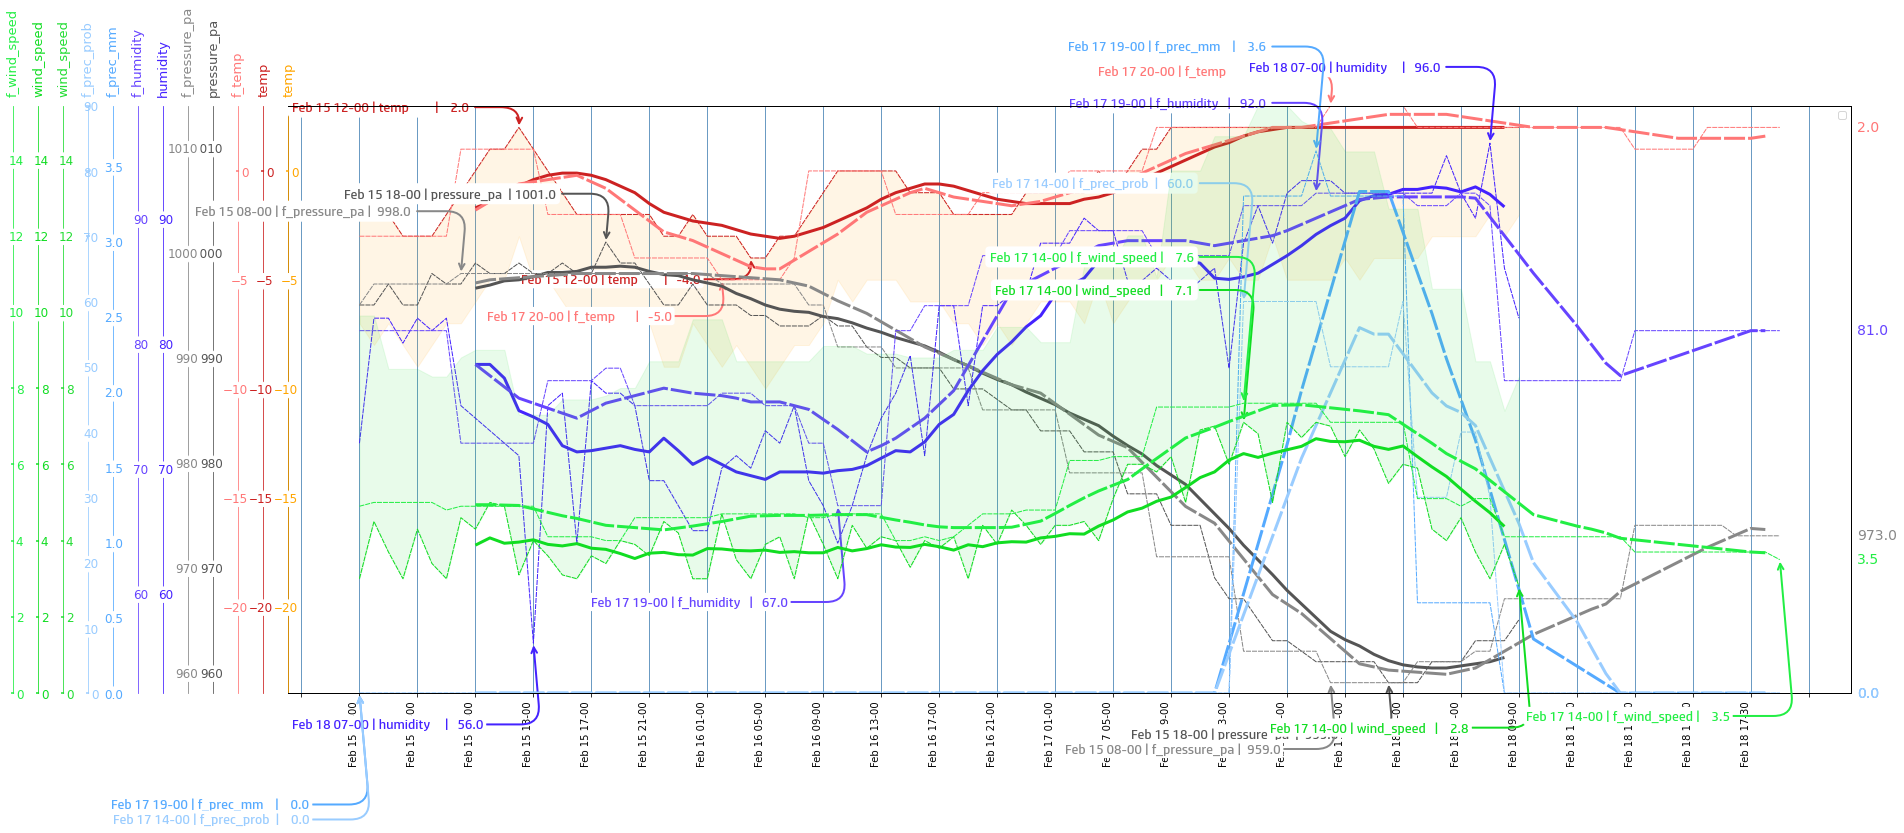

0:00:08.198 ₀╷₀₀╷₀₈.₉₀₁ ['2022-02-18 18-00', 2, 1055]
0:00:05.803 ₀╷₀₀╷₁₄.₇₀₄ ['2022-02-18 17-30', 3, 1055]
0:00:05.610 ₀╷₀₀╷₂₀.₃₁₄ ['2022-02-18 17-00', 4, 1055]
0:00:05.680 ₀╷₀₀╷₂₅.₉₉₅ ['2022-02-18 16-30', 5, 1055]
0:00:05.974 ₀╷₀₀╷₃₁.₉₇₀ ['2022-02-18 16-00', 6, 1055]
0:00:05.379 ₀╷₀₀╷₃₇.₃₅₁ ['2022-02-18 15-30', 7, 1055]
0:00:05.476 ₀╷₀₀╷₄₂.₈₂₈ ['2022-02-18 15-00', 8, 1055]
0:00:05.308 ₀╷₀₀╷₄₈.₁₃₇ ['2022-02-18 14-30', 9, 1055]
0:00:05.620 ₀╷₀₀╷₅₃.₇₅₇ ['2022-02-18 14-00', 10, 1055]
0:00:05.585 ₀╷₀₀╷₅₉.₃₄₂ ['2022-02-18 13-30', 11, 1055]
0:00:05.700 ₀╷₀₁╷₀₅.₀₄₂ ['2022-02-18 13-00', 12, 1055]
0:00:05.605 ₀╷₀₁╷₁₀.₆₄₉ ['2022-02-18 12-30', 13, 1055]
0:00:05.555 ₀╷₀₁╷₁₆.₂₀₅ ['2022-02-18 12-00', 14, 1055]
0:00:05.530 ₀╷₀₁╷₂₁.₇₃₆ ['2022-02-18 11-30', 15, 1055]
0:00:05.537 ₀╷₀₁╷₂₇.₂₇₄ ['2022-02-18 11-00', 16, 1055]
0:00:05.685 ₀╷₀₁╷₃₂.₉₆₀ ['2022-02-18 10-30', 17, 1055]
0:00:06.081 ₀╷₀₁╷₃₉.₀₄₂ ['2022-02-18 10-00', 18, 1055]
0:00:05.653 ₀╷₀₁╷₄₄.₆₉₆ ['2022-02-18 09-00', 19, 1055]
0:00:05.423 ₀╷₀₁╷₅

C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])


0:00:06.108 ₀╷₀₃╷₄₈.₆₇₄ ['2022-02-17 12-00', 40, 1055]


C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])


0:00:05.930 ₀╷₀₃╷₅₄.₆₀₅ ['2022-02-17 11-00', 41, 1055]


C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])


0:00:05.177 ₀╷₀₃╷₅₉.₇₈₂ ['2022-02-17 10-00', 42, 1055]


C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])


0:00:05.610 ₀╷₀₄╷₀₅.₃₉₃ ['2022-02-17 09-00', 43, 1055]


C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])


0:00:05.692 ₀╷₀₄╷₁₁.₀₈₅ ['2022-02-17 08-00', 44, 1055]


C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])


0:00:05.554 ₀╷₀₄╷₁₆.₆₄₀ ['2022-02-17 07-00', 45, 1055]


C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])
C:\Users\SAF8C~1.SAV\AppData\Local\Temp/ipykernel_31228/3781985185.py:83: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax[k].set_ylim([y_min, y_max])


0:00:05.674 ₀╷₀₄╷₂₂.₃₁₄ ['2022-02-17 06-00', 46, 1055]
0:00:06.155 ₀╷₀₄╷₂₈.₄₇₁ ['2022-02-17 05-00', 47, 1055]
0:00:05.820 ₀╷₀₄╷₃₄.₂₉₁ ['2022-02-17 04-00', 48, 1055]
0:00:05.496 ₀╷₀₄╷₃₉.₇₈₈ ['2022-02-17 03-00', 49, 1055]
0:00:05.625 ₀╷₀₄╷₄₅.₄₁₃ ['2022-02-17 02-00', 50, 1055]
0:00:05.595 ₀╷₀₄╷₅₁.₀₀₉ ['2022-02-17 01-00', 51, 1055]
0:00:05.668 ₀╷₀₄╷₅₆.₆₇₈ ['2022-02-17 00-00', 52, 1055]
0:00:05.824 ₀╷₀₅╷₀₂.₅₀₃ ['2022-02-16 23-00', 53, 1055]
0:00:05.829 ₀╷₀₅╷₀₈.₃₃₄ ['2022-02-16 22-00', 54, 1055]
0:00:05.752 ₀╷₀₅╷₁₄.₀₈₇ ['2022-02-16 21-00', 55, 1055]
0:00:05.555 ₀╷₀₅╷₁₉.₆₄₂ ['2022-02-16 20-00', 56, 1055]
0:00:05.869 ₀╷₀₅╷₂₅.₅₁₂ ['2022-02-16 19-00', 57, 1055]
0:00:05.708 ₀╷₀₅╷₃₁.₂₂₀ ['2022-02-16 18-00', 58, 1055]
0:00:05.442 ₀╷₀₅╷₃₆.₆₆₃ ['2022-02-16 17-00', 59, 1055]
0:00:05.631 ₀╷₀₅╷₄₂.₂₉₅ ['2022-02-16 16-00', 60, 1055]
0:00:05.823 ₀╷₀₅╷₄₈.₁₁₈ ['2022-02-16 15-00', 61, 1055]
0:00:05.911 ₀╷₀₅╷₅₄.₀₃₀ ['2022-02-16 14-00', 62, 1055]
0:00:05.608 ₀╷₀₅╷₅₉.₆₃₈ ['2022-02-16 13-00', 63, 1055]
0:00:05.55

In [8]:

pd.options.mode.chained_assignment = None

tm()

# metric_cols =['obs_time', 'temp', 'feels_like', 'icon', 'condition', 
#         'wind_speed', 'wind_dir', 'pressure_mm', 'pressure_pa', 
#         'humidity', 'daytime', 'polar', 'season', 'wind_gust']

dfn = read_weather_from()

global temp_max, temp_min

temp_max = dfn[['feels_like','temp','f_temp']].max().max()
temp_min = dfn[['feels_like','temp','f_temp']].min().min()

def plot_draw(t_shift = 1):
    
    global temp_max, temp_min
   
    df = dfr['full_data'][-100-t_shift:-1-t_shift]
    
    global ax, ax_shift,annotation_shift,annotations,legend

    [legend,ax,ax_shift] = [{},{},0] 
   
    [annotations,annotation_shift] = [[],0]

    x = [datetime.utcfromtimestamp(ts).strftime('%b %d %H-%M') for ts in df['obs_time']]
    
#     file_pref_date_time = str(x[-1:][0])
    
    file_pref_date_time = datetime.utcfromtimestamp(df['obs_time'].iloc[-1]).strftime('%Y-%m-%d %H-%M')
    
    
    
    
#     fname = file_pref_date_time + '.ywf_' +strftime("%Y-%m-%d %H-%M", gmtime()) # [:-9]
#     fname = 'ywf_' +strftime("%Y-%m-%d %H-%M", gmtime()) # [:-9]
    fname = file_pref_date_time + '_ywf'    
    
#     print (file_pref_date_time)
    
    tm([file_pref_date_time,t_shift ,dfr['full_data'].shape[0]])

    if (os.path.isfile('plt/anim/'+fname+'.png')): return 
    
    
    plt.rcParams["axes.axisbelow"] = False
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams["figure.figsize"] = (28,12)

    fig,ax1  = plt.subplots()
    fig.patch.set_facecolor('white')
    
    loc = plticker.MultipleLocator(base=4.0)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%Y %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gcf().autofmt_xdate()


    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='y', rotation=90, color='w')
    ax1.get_yaxis().set_visible(False)

    ax1.grid(color='steelblue')

    def draw_line (**kwargs):

        global ax_shift,annotation_shift,annotations, ax, legend

        p = Struct(**kwargs)
        k = p.data_key
        
#         print (p.__dict__)

        ax[k] = ax1.twinx()
        ax[k].xaxis.set_major_locator(loc)

        y_max = p.max_y if hasattr(p, 'max_y') else df[k].max()
        y_min = p.min_y if hasattr(p, 'min_y') else df[k].min()

        ax[k].set_ylim([y_min, y_max])

        ax[k].spines['left'].set_position(("axes", ax_shift))
        ax[k].spines['left'].set_color(p.color)    
        ax[k].yaxis.set_label_coords(ax_shift,1.02)

        ax[k].set_ylabel('Example', fontsize=13, horizontalalignment='left', zorder=100,  position=(ax_shift-0.004,1.015))

    #     ax[k].yaxis.set_ticks_position('left')
        ax[k].yaxis.tick_left()
        ax[k].yaxis.set_tick_params(width=5)
        ax[k].tick_params(axis='y', direction='inout', pad = -12, length=16, width=10, labelsize = 12, labelrotation =0 )


        bbox = dict(boxstyle="round",  pad=0.1, ec="w", fc="w", alpha=1)
        plt.setp(ax[k].get_yticklabels(), bbox=bbox)

        ax_shift -= .016


        ax[k].yaxis.label.set_color(p.color)
        ax[k].set_ylabel(k)

        tkw = dict(size=4, width=1.5)
        ax[k].tick_params(axis='y', colors=p.color, **tkw)

        if p.plot_type == 'fill' :
    #         ax[k].fill_between(x, df[k], where=(df[k] > -30), color=p.color, alpha=p.alfa)
            ax[k].fill_between(x, df[k], df[p.fill_k] , color=p.color, alpha=p.alfa)

    #         legend[k] = k
        else:
            legend[k] = k
            ax[k].plot(x,df[k], color=p.color, linewidth=p.linewidth, linestyle=p.linestyle, 
                       dashes= p.dashes if hasattr(p, 'dashes') else (5,1))
            annotations.append( (x,df[k],k,p.color,ax[k] ))

        if hasattr(p, 'rolling_avg') :

            parm = [lw,ls,dash,min_max_k] = [ 3,
                   ':', (7, 1), [col  for col in df.columns if k in col ]]  if 'f_' in k else [ 3,
                   '-', (4, 0), [col  for col in df.columns if k in col ]] 
                
             
            y_max = p.max_y if hasattr(p, 'max_y') else dfn[min_max_k].max().max()
            y_min = p.min_y if hasattr(p, 'min_y') else dfn[min_max_k].min().min()
            
            df.loc[:,k+'_mean'] = df[k].rolling(window=10).mean().shift(-1)            
    
            ax[k].plot(x,df[k+'_mean'], color=p.color, linewidth=lw, linestyle=ls, dashes=dash)
            ax[k].set_ylim([y_min, y_max])

    


    draw_line(data_key = 'temp',   plot_type='fill', color="orange", linewidth=2, alfa=.1, linestyle='-', 
              max_y=temp_max, min_y=temp_min, fill_k = 'feels_like')
    
    draw_line(data_key = 'temp',    plot_type='line', color="#c22", linewidth=1, alfa=.3, linestyle='-', 
              max_y=temp_max, min_y=temp_min, rolling_avg = True)
    
    draw_line(data_key = 'f_temp',  plot_type='line', color="#f77", linewidth=1, alfa=.3, linestyle=':', 
              max_y=temp_max, min_y=temp_min, rolling_avg = True)
    
    

    v_max = dfn[['pressure_pa','f_pressure_pa']].max().max()
    v_min = dfn[['pressure_pa','f_pressure_pa']].min().min()

    draw_line(data_key = 'pressure_pa',  plot_type='line', color="#555", linewidth=1, alfa=.3, linestyle='-', rolling_avg = True, max_y=v_max, min_y=v_min )
    draw_line(data_key = 'f_pressure_pa',plot_type='line', color="#888", linewidth=1, alfa=.3, linestyle=':', rolling_avg = True, max_y=v_max, min_y=v_min )

    
    v_max = dfn[['humidity','f_humidity']].max().max()
    v_min = dfn[['humidity','f_humidity']].min().min()


    draw_line(data_key = 'humidity',  plot_type='line', color="#4422ff", linewidth=1, alfa=.3, linestyle='-', rolling_avg = True, max_y=v_max, min_y=v_min)
    draw_line(data_key = 'f_humidity',plot_type='line', color="#6644ff", linewidth=1, alfa=.3, linestyle=':', rolling_avg = True, max_y=v_max, min_y=v_min)

    draw_line(data_key = 'f_prec_mm',    plot_type='line', color="#55aaff", linewidth=1, alfa=.4, linestyle=':', rolling_avg = True)
    draw_line(data_key = 'f_prec_prob',  plot_type='line', color="#99ccff", linewidth=1, alfa=.4, linestyle=':', rolling_avg = True)
    
    

    wind_min = dfn[['wind_gust','wind_speed']].min().min()
    wind_max = dfn[['wind_gust','wind_speed']].max().max()


    draw_line(data_key = 'wind_speed',      plot_type='fill', color="#22dd33",  linewidth=1, alfa=.1, linestyle='--', marker='', 
              max_y=wind_max, min_y=wind_min,  fill_k = 'wind_gust')  

    draw_line(data_key = 'wind_speed',      plot_type='line', color="#11dd22",   linewidth=1, alfa=.3, linestyle='--', marker='',
              max_y=wind_max, min_y=wind_min,  
              rolling_avg = True
             ) 
    
    draw_line(data_key = 'f_wind_speed',      plot_type='line', color="#22ee44",   linewidth=1, alfa=.3, linestyle='--', marker='',
              max_y=wind_max, min_y=wind_min,  
              rolling_avg = True
             ) 
    
    ax1.legend([l for l in legend])

    [annot_max(a) for a in annotations]
   
    if t_shift < 2:

        plt.show()

        
#     fname = str(t_shift).rjust(3,'0') + '.ywf_' +strftime("%Y-%m-%d %H-%M", gmtime())[:-9]
    
#     fname = file_pref_date_time + '_ywf'
#     fname = 'yw_' +strftime("%Y-%m-%d %H-%M", gmtime()) # [:-9]
    

    fig.savefig('plt/anim/'+fname+'.png', bbox_inches='tight')  
    fig.savefig('plt/temp.png', bbox_inches='tight')  

    fig.clear()
    plt.close(fig)
    

file_range = dfr['full_data'].shape[0] 

# file_range = 1

# print (dfr['full_data'].shape[0])

[plot_draw(i+1) for i in range(file_range-20)] #
tm('>>>>>')